# Fading: An introduction to large scale fading

The performance of wireless communication systems is mainly governed by the wireless channel environment. As opposed to the typically static and predictable characteristics of a wired channel, the wireless channel is rather dynamic and unpredictable, which makes an exact analysis of the wireless communication system often difficult.

Radio propogation whose characteristics we are interested in studying is mainly affected by:
* **Relfection**
* **Diffraction**
* **Scattering**

Keeping in mind the range of radio wavelengths (1mm to 100km), we obtain reflection when the obstacle is large (say the earth or a building), diffraction when similar dimensions are encountered and finally scattering when the obstacle is much smaller.

## Fading

It refers to the variation of signal amplitude over time and frequency. In comparison to additive noise, fading is another source of signal degradation that is characterized as a non-additive signal disturbance in the wireless channel. It could be:

* multi-path (induced) fading: due to multi-path propogation
or
* shadow fading: shadowing from obstacles that affect propogation.

Fading is often characterised as:

* Large scale: involves average path loss and shadowing. Eg: as a mobile moves through a large distance like a cell.

* Small scale: involves rapid variation of signal levels due to multi-path interference or time variation.

![small scale vs large scale fading](small_large_fading.png)

## Link Budget

Link budget is an important tool in the design of radio communication systems. We essentially plot the percentage of power in the signal versus distance. Accounting for all the gains and losses through the wireless channel to the receiver, it allows for predicting the received signal strength along with the required power margin. Path loss and fading are the two most important factors to consider in link budget.

![link_budget](link_budget.png)

Notice that the mean path loss is deterministic, while the shadowing and small scale fading are stochastic. Due to this randomness, we prefer to have a margin for error during design, typically around 1 to 2 %.

The next section deals with how to model large scale fading for link budget design.

## General Path Loss Model

The free-space propagation model is used for predicting the received signal strength in the line- of-sight (LOS) environment where there is no obstacle between the transmitter and receiver. It is often adopted for the satellite communication systems.

Notation:

* $d$: distance between the transmitter and receiver (in meters).
* $G_t$: transmit gain;  $G_r$: receive gain
* $\lambda$: wavelength
* $P_t$: transmission power
* $L$: system loss factor, which is independent of propagation environment. The system loss factor represents overall attenuation or loss in the actual system hardware, including transmission line, filter, and antennas. Typically $L> 1$, with $L=1$ as ideal.

We construct a simple model as:

$$P_r(d) = \frac{P_t G_tG_r\lambda^2}{(4\pi)^2d^2L}$$

with this, we can obtain free-space path loss, $PL_F(d)$ (with $L=1$), in decibels:

$$PL_F(d) = 10 \log (P_t/P_r) = -10 \log (\frac{G_tG_r\lambda^2}{(4\pi)^2d^2})$$

Excluding antenna gains, we get:

$$PL_F(d) = 10\log(P_t/P_r) = -20 \log (\frac{\lambda}{4 \pi d})$$

Let us plot the free space model.

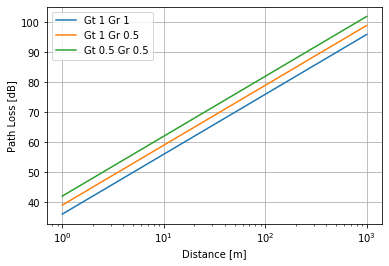

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
%matplotlib inline 

def PL_free(d: float, fc: float = 1500e6, Gt: float = 1, Gr: float = 1):
    """
    Free Space path loss model
    :fc : Carrier frequency
    :d : Distance between Tx and Rx (in m)
    :Gt/ Gr : antenna gains

    Out: PL: pathloss (dB)
    """
    lam = 3e8 / fc
    PL = (lam * np.sqrt(Gr * Gt)) / (4 * np.pi * d)
    return -20 * np.log10(PL)


d = np.linspace(1, 10 ** 3, num=10000)
GtGr_ll = [(1, 1), (1, 0.5), (0.5, 0.5)]

for GtGr in GtGr_ll:
    Gt, Gr = GtGr
    plt.semilogx(d, PL_free(d,Gt=Gt,Gr=Gr))

legend = [f"Gt {GtGr[0]} Gr {GtGr[1]}" for GtGr in GtGr_ll]

plt.xlabel("Distance [m]")
plt.ylabel("Path Loss [dB]")
plt.legend(legend)
plt.grid()
plt.show()    

## Log distance path loss model

We modify the previous free space model by adding an exponent term $n$ that varies with environment. In effect, we get:

$$PL_{LD}(d) = PL_F(d_0) + 10n \log (\frac{d}{d_0}) $$, where $d_0$ is a reference distance at which or closer to the path loss inherits the characteristics of free-space loss. Essentially, we model the environment by free space ($n=2$) upto $d_0$, and then by the exponent $n$. We have $n$ typically between 2 and 6. Table 1 below (_source: Rappaport and Theodore et al., 2002_) contains path loss exponents for several environments typically encountered.

![path_loss_exponent_table](path_exp_table.png)

One typically sets $d_0$ depending on the task at hand. 

## Okumara-Hata Model

This is a hand engineered model commonly adopted for path loss in an urban area. This particular model mainly covers the typical mobile communication system characteristics with a frequency band of 500–1500 MHz, cell radius of 1–100 km, and an antenna height of 30 m to 1000 m. 

The path loss at distance $d$ in the Okumura model is given as:

$$PL_{OK}(d) [dB] = PL_F + A_{MU}(f,d) - G_{R_x} - G_{T_x} + G_{area}$$

where:

* $ A_{MU}(f,d)$ is the medium attenuation factor at a frequency $f$, distance $d$.
* G_{area} is the gain for propogation in a specific area.
* G_{R_x} and G_{T_x} are a function of antenna height, assuming other factors like antenna pattern don't matter.

Okumura empirically obtained graphs for $A_{MU},G_{area}$ from actual measurements. This model was exntended to suburban and open areas as the Hata model, viz ...

* **Urban:**

$$PL_{Hata,U}(d) [dB] = 69.55 + 26.16 \log f_c- 13.82 \log h_{T_x} - C_{R_x} + (44.9 - 6.55\log h_{T_x})\log d$$

* **Sub-urban:**

$$PL_{Hata,SU}(d) [dB] = PL_{Hata,U} - 2 (\log \frac{f_c}{28})^2 -5.4(d)$$

* **Rural or Open:**

$$PL_{Hata,R}(d) [dB] = PL_{Hata,U} - 4.78 (\log f_c)^2 + 18.33 \log f_c - 40.97(d)$$

with, $C_{R_x}$ being the correlation coefficient of the receive antenna, which depends on the size of
coverage.

For small to medium coverage, $C_{R_x}$ is given by:

$$C_{R_x} = 0.8 + (1.1 \log f_c - 0.7)h_{R_x} -1.56\log f_c$$

And for large coverage by:

\begin{align*}
C_{R_x}= \left\{
\begin{array}{ll}
      8.29 (\log (1.54 h_{R_x}))^2 - 1.1  & 150 MHz\leq f_c \leq 200 MHz \\
      3.2 (\log (11.75 h_{R_x}))^2 - 4.97 & 200MHz\leq f_c\leq 1500 MHz\\
\end{array} 
\right.
\end{align*}

We plot the _Hata Model_ below. Notice that path loss is significantly higher for urban as compared to suburban or rural (open) regions, simply due to the dense obstructions observed in urban areas.

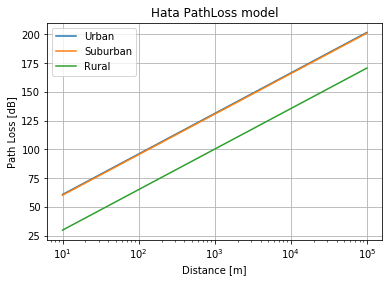

In [40]:
def PL_Hata(
    d: float, fc: float = 1500e6, hrx: float = 2, htx: float = 30, env: str = "Urban"
):
    """
    Hata path loss model, for large scale coverage
    :fc : Carrier frequency
    :d : Distance between Tx and Rx (in m)
    :hrx: height of receiving antenna
    :htx : height of transmitting antenna
    :env: Environment

    Out: PL: pathloss (dB)
    """
    assert env in ["Urban", "Suburban", "Rural"], f"Environment {env} not defined."
    fc /= 1e6

    # Low
    if (fc >= 150) and (fc <= 200):
        C_rx = 8.29 * (np.log10(1.54 * hrx)) ** 2 - 1.1
    elif fc >= 200:
        C_rx = 3.2 * (np.log10(11.75 * hrx)) ** 2 - 4.97
    else:
        C_rx = 0.8 + (1.1 * np.log10(fc) - 0.7) * hrx - 1.56 * np.log10(fc)

    PL = (
        69.55
        + 26.16 * np.log10(fc)
        - 13.82 * np.log10(htx)
        - C_rx
        + (44.9 - 6.55 * np.log10(htx)) * np.log10(d /1000)
    )

    if env == "Suburban":
        PL -= 2 * ((np.log10(fc / 28)) ** 2) - 5.4
    elif env == "Rural":
        PL += (18.33 - 4.78 * np.log10(fc)) * np.log10(fc) - 40.97
    return PL


d = np.linspace(10, 10 ** 5, num=10000)

# environments
legend = ["Urban","Suburban","Rural"]

for env in legend:
    plt.semilogx(d, PL_Hata(d,env=env))

plt.xlabel("Distance [m]")
plt.ylabel("Path Loss [dB]")
plt.title("Hata PathLoss model")
plt.legend(legend)
plt.grid()
plt.show()   

## Exercises

### Question 1

In a similar manner to figure 1, plot the log distance and log normal plots for $f_c = 1500 MHz$, distance varying from 1m to 1km. Take values for $n$ from Table 1. Assume $\sigma=3, d_0= 100m$.

Compare for $G_t, G_r = (1,1),(1,0.5), (0.5, 0.5)$.

### Question 2

We introduce the IEEE 802.16dA model, which accounts for macro cells in sub-urban regions. It is modelled after and is appropriate for hilly terrain with moderate-to-heavy tree densities.

In this model:

$$PL_{802.16A}(d) [dB] = PL_F(d_0) + 10\gamma \log_{10} (\frac{d}{d_0}) + C_f + C_{R_x} \quad \text{for } d>d_0$$

Where:

* $\gamma = 4.6 - 4*h_{T_x} + 3.6/h_{T_x}$ 
* $d_0=100m$
* $h_{T_x}$ is the transmitting antenna height
* $C_f = 6 \log_10 (\frac{f_c}{2000})$: the correlation coefficient for carrier frequency
* $C_{R_x} = -10.8 \log_10 (\frac{h_{R_x}}{2})$: the correlation coefficient for the receive antenna

Plot the path loss for this model. Notice that it is discontinuous. Propose a method to smoothen it by derving a new reference distance. (_Hint: Set equate the free space loss to the path loss at the reference distance_)

## References

1. MIMO OFDM Wireless Communications, Y. Chang and W. Yang, IEEE Press, 2010.
2. [Numpy Docs](https://numpy.org).
3. [Matplotlib Docs](https://matplotlib.org).